<a href="https://colab.research.google.com/github/jumafernandez/generacion_prompts/blob/main/semana3/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generación de imágenes con Stable Diffusion (con GPU)**

Esta notebook muestra cómo usar Stable Diffusion en Google Colab para generar imágenes de manera más rápida aprovechando la GPU.

## **1️⃣ Instalar dependencias necesarias**
En caso que Google Colab o tu entorno de trabajo no tenga **Stable Diffusion** preinstalado, es necesario instalarlo manualmente así como las librerías para aceleradoras gráficas:

In [ ]:
#!pip install diffusers transformers xformers accelerate --quiet

!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.7/848.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install xformers accelerate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 MB 9.4 MB/s eta 0:00:00


## **2️⃣ Habilitar GPU en Colab**
Antes de ejecutar esta notebook, asegúrate de activar la GPU en Colab:
- Ve a **Entorno de ejecución** → **Cambiar tipo de entorno de ejecución**.
- Selecciona **GPU** en la opción de **Acelerador por hardware**.
- Guarda los cambios.

In [ ]:
import torch

# Verificar si Colab tiene acceso a una GPU
print(torch.cuda.is_available())  # Debe devolver True
print(torch.cuda.get_device_name(0))  # Nombre de la GPU asignada

True
Tesla T4


## **3️⃣ Cargar Stable Diffusion y configurar GPU**
Ahora cargamos el modelo y lo enviamos a la GPU para acelerar la inferencia.


In [ ]:
from diffusers import StableDiffusionPipeline

# Cargar el modelo preentrenado
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Enviar el modelo a la GPU para mayor velocidad
pipe.to("cuda")

# Optimizar memoria para inferencia más rápida
pipe.enable_xformers_memory_efficient_attention()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

 ## **4️⃣ Generar una imagen con Stable Diffusion**
Ahora generamos una imagen usando un prompt y la guardamos.

In [ ]:
prompt = "A futuristic city at sunset, ultra detailed"
prompt = "Un pueblo del interior de Argentina al atardecer, con mucho nivel de detalle."

In [ ]:
image_sd = pipe(prompt).images[0]
image_sd.save("image_stable_diffusion.png")

  0%|          | 0/50 [00:00<?, ?it/s]

Habrás notado que aparece una barra de progreso en la terminal con un contador en formato **X/50**, donde X es un número que va aumentando.

## 📌 ¿Qué significa?
Esta barra representa el **proceso de generación de la imagen** mediante **Stable Diffusion**. En particular, indica el avance de los **50 pasos de inferencia** que el modelo realiza para transformar ruido aleatorio en una imagen coherente.

## 🔍 ¿Por qué hay 50 pasos?
**Stable Diffusion** es un **modelo de difusión** que funciona eliminando progresivamente el ruido de una imagen inicial aleatoria hasta obtener una imagen final bien definida. Este proceso de eliminación de ruido ocurre en **varios pasos**, por defecto **50**.

### ✨ Explicación del proceso:
1. **Paso 0**: Se inicia con una imagen completamente aleatoria (ruido puro).
2. **Paso 1**: Se aplica un primer ajuste para reducir ruido y comenzar a dar forma a la imagen.
3. **Paso 10**: Se empiezan a ver algunas estructuras generales, pero con ruido aún visible.
4. **Paso 25**: La imagen ya es reconocible, pero con detalles borrosos.
5. **Paso 50**: La imagen está refinada y lista.

📌 **Más pasos** = mayor calidad y coherencia en la imagen.  
📌 **Menos pasos** = generación más rápida, pero con menos detalles.

## ⚡ ¿Cómo controlar la cantidad de pasos?
Podemos modificar el número de pasos usando el parámetro `num_inference_steps`:

```python
image_sd = pipe(prompt, num_inference_steps=25).images[0]  # Reducido a 25 pasos
image_sd.save("image_stable_diffusion_faster.png")


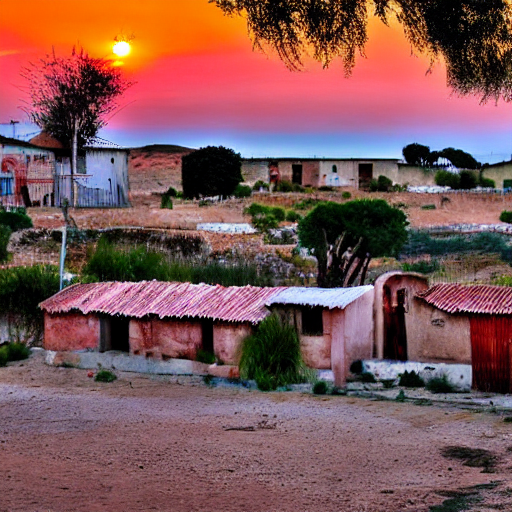

In [ ]:
from IPython.display import Image

Image("image_stable_diffusion.png")

## **5️⃣ Controlando la cantidad de pasos**

Cuando generamos imágenes con diferentes valores de `num_inference_steps`, queremos **ver el efecto en tiempo real** sin esperar a que termine todo el bucle.

### 📌 **¿Qué hace este código?**  
1️⃣ Usa `tqdm` para mostrar una **barra de progreso** mientras genera imágenes.  
2️⃣ Guarda cada imagen generada con su cantidad de pasos en el nombre del archivo.  
3️⃣ Usa `display(image_sd)` para **mostrar la imagen en la salida de Colab** inmediatamente.  
4️⃣ Agrega `print(f"📌 Imagen generada con {steps} pasos:")` para que cada imagen tenga su descripción en la salida.  

💡 **Así podemos comparar fácilmente la calidad de cada imagen en la misma celda de Colab.** 🚀


Generando imágenes:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

📌 Imagen generada con 10 pasos:


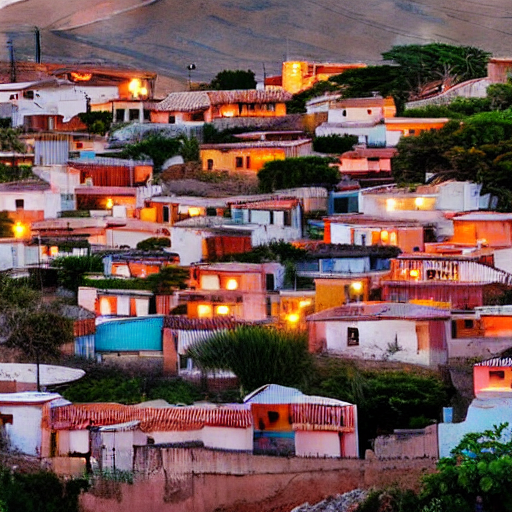

Generando imágenes:  20%|██        | 1/5 [00:05<00:22,  5.55s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

📌 Imagen generada con 25 pasos:


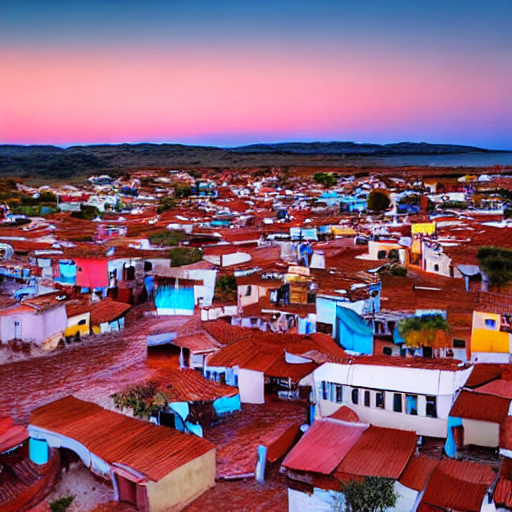

Generando imágenes:  40%|████      | 2/5 [00:17<00:27,  9.30s/it]

  0%|          | 0/50 [00:00<?, ?it/s]

📌 Imagen generada con 50 pasos:


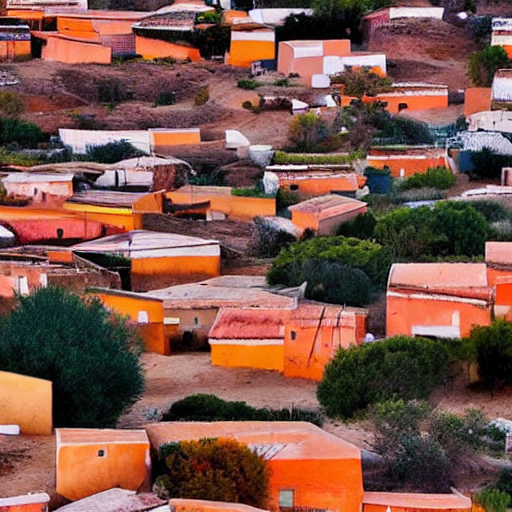

Generando imágenes:  60%|██████    | 3/5 [00:40<00:31, 15.57s/it]

  0%|          | 0/100 [00:00<?, ?it/s]

📌 Imagen generada con 100 pasos:


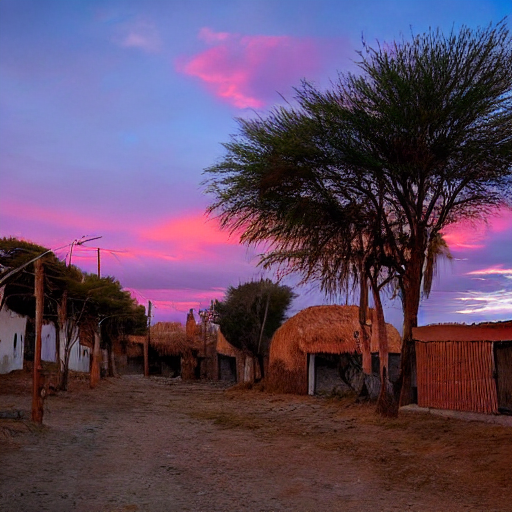

Generando imágenes:  80%|████████  | 4/5 [01:26<00:27, 27.54s/it]

  0%|          | 0/150 [00:00<?, ?it/s]

📌 Imagen generada con 150 pasos:


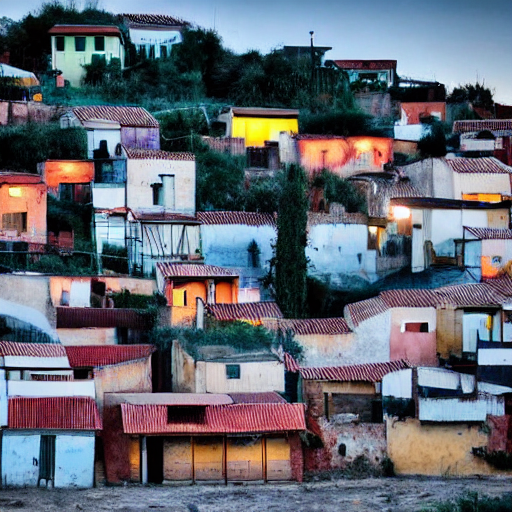

Generando imágenes: 100%|██████████| 5/5 [02:36<00:00, 31.25s/it]


In [ ]:
from IPython.display import display
from tqdm import tqdm  # Barra de progreso

# Generar imágenes con diferentes cantidades de pasos
for steps in tqdm([10, 25, 50, 100, 150], desc="Generando imágenes"):
    image_sd = pipe(prompt, num_inference_steps=steps).images[0]
    image_sd.save(f"image_{steps}_steps.png")

    # Mostrar la imagen generada en Colab
    print(f"📌 Imagen generada con {steps} pasos:")
    display(image_sd)